# Application du SVM en Sentiment Analysis
Dans ce TP, nous allons explorer l'analyse de sentiment des critiques de films. Nous utiliserons un
ensemble de données de critiques de films pré-annotées pour entraîner un modèle d'apprentissage
automatique capable de prédire si une critique est positive ou négative.
En utilisant le dataset, partagé en google Classroom, développer un modèle intelligent en utilisant
techniques de Text mining et Machine Learning en suivant les étapes de construction vues dans le
cours.
#### 1- import libraries:

In [31]:
import numpy as np
import pandas as pd
from sklearn import svm
import seaborn as sns
import spacy
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
print("Set up completed ....")

Set up completed ....


In [2]:
# load the data
X = pd.read_csv('./reviews.txt', names=['review'])
y = pd.read_csv('./labels.txt',names=['label'])

In [3]:
X.shape

(5000, 1)

In [4]:
y.shape

(5000, 1)

In [5]:
X.head()

,review
0,bromwell high is a cartoon comedy . it ran at ...
1,story of a man who has unnatural feelings for ...
2,homelessness or houselessness as george carli...
3,airport starts as a brand new luxury pla...
4,brilliant over acting by lesley ann warren . ...


In [6]:
y.head()

,label
0,positive
1,negative
2,positive
3,negative
4,positive


<Axes: xlabel='label', ylabel='Count'>

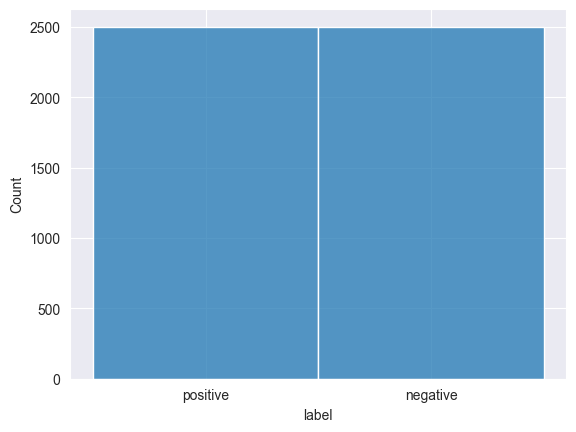

In [7]:
sns.histplot(y.label)

In [8]:
y = y.label.map({'positive':1 , 'negative':0})

#### 3- prepare the data for training :

In [9]:
nlp = spacy.load("en_core_web_sm")

For any machine learning project, once you've gathered the data, the first step is to process it to make useful inputs to your model.

- Remove noise: You will first want to remove noise from your data -- that is, remove words that don't tell you much about the content. These include all common words like 'I, you, are, is, etc...' that would not give us enough information on the sentiment.
- We'll also remove stock market tickers, retweet symbols, hyperlinks, and hashtags because they can not tell you a lot of information on the sentiment.
- You also want to remove all the punctuation from a tweet. The reason for doing this is because we want to treat words with or without the punctuation as the same word, instead of treating "happy", "happy?", "happy!", "happy," and "happy." as different words.
- Finally, you want to use stemming to only keep track of one variation of each word. In other words, we'll treat "motivation", "motivated", and "motivate" similarly by grouping them within the same stem of "motiv-".

In [10]:
def preprocessing(text: str) -> str:
    doc = nlp(text.lower())
    tokens = [ word.lemma_ for word in doc if not (word.is_stop or word.is_punct)]
    return ' '.join(tokens)

In [11]:
X["processed_review"] = X.review.apply(lambda text:preprocessing(text))

In [12]:
X.head()

,review,processed_review
0,bromwell high is a cartoon comedy . it ran at ...,bromwell high cartoon comedy run time program ...
1,story of a man who has unnatural feelings for ...,story man unnatural feeling pig start opening ...
2,homelessness or houselessness as george carli...,homelessness houselessness george carlin sta...
3,airport starts as a brand new luxury pla...,airport start brand new luxury plane l...
4,brilliant over acting by lesley ann warren . ...,brilliant act lesley ann warren well dramati...


In [13]:
# split the data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X.processed_review, y, test_size=0.2)

In [14]:
X_train.shape, y_train.shape

((4000,), (4000,))

In [17]:
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)

In [18]:
X_train.shape

(4000, 26052)

In [19]:
X_test = cv.transform(X_test)

#### 4- train the SVM model:

In [22]:
# Parameters to test for each SVM type
parameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf']
}
# SVM model
svm_model = svm.SVC()

# Find the best hyperparameters for each SVM type
grid_svm = GridSearchCV(svm_model, parameters, refit = True, verbose = 3)
grid_svm.fit(X_train, y_train)

# print best parameter after tuning
print(grid_svm.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svm.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.896 total time=   6.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.858 total time=   6.6s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.845 total time=  12.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.846 total time=  14.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.855 total time=  14.6s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=  18.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=  16.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=  13.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=  12.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=  12.4s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.896 total time=   5.7s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

In [25]:
grid_predictions = grid_svm.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       521
           1       0.84      0.89      0.87       479

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



#### 5- regression model:

In [28]:
regression_model = LogisticRegression()
regression_model.fit(X_train,y_train)

C:\Users\asus\programing\ML\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_predicted = regression_model.predict(X_test)

# print classification report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       521
           1       0.86      0.89      0.88       479

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



#### 6- using naive byes:

In [32]:
naive_byes_model = MultinomialNB()
naive_byes_model.fit(X_train, y_train)

MultinomialNB()

In [33]:
y_predicted = naive_byes_model.predict(X_test)

# print classification report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       521
           1       0.91      0.89      0.90       479

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



#### the Final result:
<table>
  <tr>
    <th>model type</th>
    <th>accuracy</th>
    <th>f1-score</th>
  </tr>
  <tr>
    <td>Naive byes model</td>
    <td>91%</td>
    <td>0.91</td>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>88%</td>
    <td>0.88</td>
  </tr>
  <tr>
    <td>SVM model</td>
    <td>87%</td>
    <td>0.87</td>
  </tr>
</table>